# 사운드 프로세싱 기초

소리는 공기를 구성하는 입자들이 진동하는 현상이다. 공기의 진동을 측정하는 양적 기준을 음압(sound pressure)라고 한다. 사운드 데이터란 이 음압의 변화를 기록한 시계열 데이터이다. 

공기 입자가 원래 균일하게 있었는데, 스피커 판떼기가 딱 공기를 치면, 공기가 모이면서 공기 사이에 압력이 높아졌다 낮아졌다 하면서 전달되지. <br>
이 sound pressure을 기록한 시계열 데이터를 사운드 데이터라고 말한다. 

## 사인 함수

- A는 크기를 크게 하는 것. 위 아래로 더 커지면, A가 커진 것. 이게 커지는게 소리가 커지는 것<br>
- 주파수는 $w$ 오메가 혹은 $f$ 기호로 표시된다. 주파수가 높으면, 더 주기가 짧아진다. 더 빨리 왔다갔다 함. 주파수 커지면, 우리 귀에는 더 높은 음으로 들린다.<br>
- $\phi$는 시작점을 의미한다. phi가 0이면, t가 0일때 0에서 시작하는 것. phi가 0이 아니면, 그 앞이나 뒤에서 시작하는 것. 그냥 사인함수 하나 보고서 위상을 인식할 순 없고, 사인함수가 여러개 있을 때 위상의 차이를 인식한다. 그 차이가 시간차로 인식이 된다. 소리가 왼쪽/오른쪽 귀에서 다르게 나면 그건 또 소리가 어디서 났는지에 대한 방향으로 인식된다. 

음압의 변화를 나타내는 시계열 데이터 중 가장 단순한 형태가 사인 함수(sine function)이다. 우선 사인 함수에 대해 알아보자. 삼각 함수 중 하나인 사인 함수는 다음과 같은 3가지 특징을 가진다.

* 진폭(amplitude) $A$: 위 아래로 움직이는 폭. 소리의 크기로 인식된다.
* 주파수(frequency) $\omega$ 또는 $f$: 진동 속도. 주파수가 높으면 빠르게 진동한다. 소리의 높낮이로 인식된다.
* 위상(phase) $\phi$: 사인 함수의 시작 시점. 위상 만큼 출발이 늦어진다. 위상의 차이는 소리의 시간차로 인식된다.

사인 함수를 수식으로 표현하면 다음과 같다. 

$$
A \sin\left(\omega t - \phi \right) 
$$

또는 

$$
A \sin\left(2\pi f t - \phi \right)
$$

여기에서 $t$는 시간을 나타내며 보통은 초(second) 단위다.

주파수(frequency)는 초당 진동의 횟수를 나타낸다. 1회전의 각도가 $360^{\circ} = 2\pi$ 라디안(radian)이므로 보통은 초당 라디안(radian per second) 단위로 표시하지만 이 값을 $2\pi$로 나누어 헤르쯔(Hz)라는 단위로 표시할 수도 있다. 1 Hz는 1초에 한 번 진동하는 주파수이다. 위 식에서 $\omega$는 초당 라디안 단위의 주파수이고 $f$는 헤르쯔 단위의 주파수이다.

$$ 
\omega = 2\pi f 
$$

주파수는 1초당 몇 라디안을 돌았는지가 된다. 혹은 1초당 몇번을 돌았는가. 

다음은 여러가지 사인 함수를 보여주는 코드이다. 이 코드에서 `A`는 진폭, `w`는 주파수 `p`는 위상을 나타낸다.

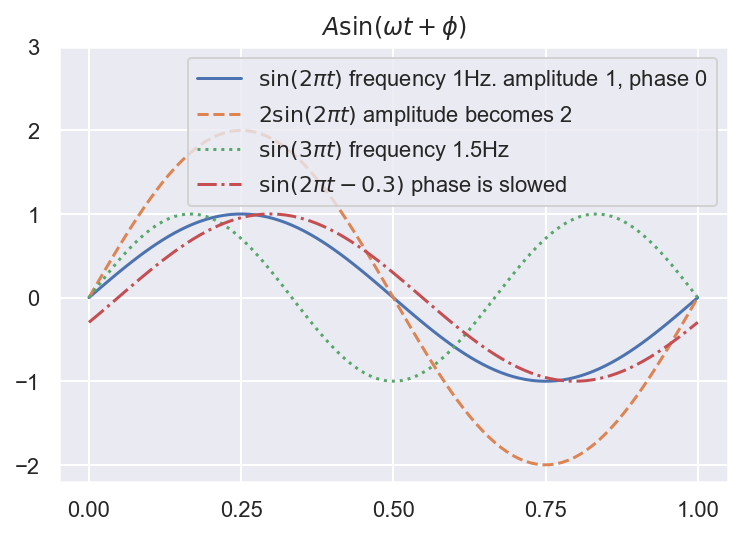

In [31]:
t = np.linspace(0, 1, 100)

plt.plot(t, 1 * np.sin(2 * np.pi * t + 0), ls="-", label=r"$\sin\left(2\pi{t}\right)$ frequency 1Hz. amplitude 1, phase 0")
plt.plot(t, 2 * np.sin(2 * np.pi * t + 0), ls="--", label=r"$2\sin\left(2\pi{t}\right)$ amplitude becomes 2")
plt.plot(t, 1 * np.sin(3 * np.pi * t + 0), ls=":", label=r"$\sin\left(3\pi{t}\right)$ frequency 1.5Hz")
plt.plot(t, 1 * np.sin(2 * np.pi * t - 0.3), ls="-.", label=r"$\sin\left(2\pi{t} - 0.3\right)$ phase is slowed")
plt.ylim(-2.2, 3)
plt.xticks(np.linspace(0, 1, 5))
plt.legend()
plt.title(r"$A\sin\left(\omega{t}+\phi\right)$")
plt.show()

코사인 함수는 사인 함수와 위상이 90도 =$\frac{\pi}{2}$ 라디안 차이가 있으므로 사인 함수의 일종으로 볼 수 있다.

$$ \cos(2\pi t) = \sin \left( 2\pi t - \frac{\pi}{2} \right) $$ 

## 주기와 주파수의 관계

주파수 $f$의 역수를 주기 $T$라고 한다. 주기는 1번의 진동에 필요한 시간을 뜻한다. 

$$ f = \dfrac{1}{T} $$

또는

$$ \omega = \dfrac{2\pi}{T} $$

따라서 사인 함수는 다음처럼 쓸 수도 있다.

$$
A \sin\left(\dfrac{2\pi}{T} t - \phi \right)
$$

## 싱글 톤

주파수는 사람에게 음의 높이(tone)로 인식된다. 사인파처럼 주파수가 일정한 음압 시계열은 사람에게 음높이가 일정한 "삐-"하는 기계음으로 들리기 때문에 하나의 사인파로 이루어진 소리를 싱글 톤(single tone)이라고도 한다. 전화를 걸 때 수신자가 전화를 받기 전까지 재생되는 통화연결음(ring tone)은 보통 400Hz~450Hz의 싱글 톤을 사용한다.

우리가 나타내는 시계열은 디지털 시계열. 연속적으로 쭉 되있는게 아니라 자세히 보면 끊어져 있잖아. 그걸 1초에 몇번 끊느냐의 기준이 보통 44100번 <br> 즉, 1초짜리 파동 그리면서 점을 44100번을 찍은거야. 

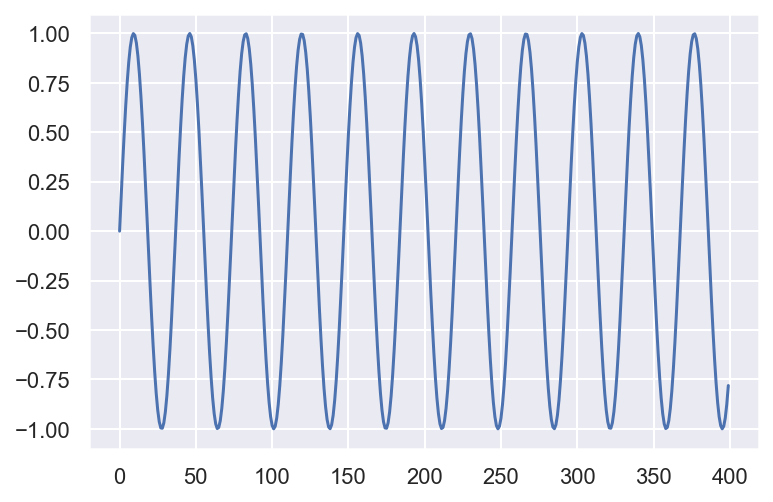

In [35]:
def single_tone(frequecy, sampling_rate=44100, duration=3):
    # frequency: 주파수
    # sampling_rate: 초당 샘플링 데이터 수. 디폴트 44100
    # duration: 지속 시간. 단위 초. 디폴트 1초
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

# 400헤르츠 소리를 1초동안 내는거야. 시계열의 갯수는 44100개의 신호가 있는 것. 
# 그리고 주파수 400이라는 것은, 1초에 400번이 반복됬다는 거야. 즉, 사인함수가 400개라는 것. 
y = single_tone(400)

plt.plot(y[:400])
plt.show()

주피터 노트북에서는 다음 코드로 사운드 데이터를 표시할 수 있다.

In [34]:
from IPython.display import Audio, display

display(Audio(y, rate=44100))

음계에서 기준이 되는 가온다(middle C)음은 261.62Hz의 싱글 톤이다.
반음(semitone, half tone, half step)이 올라갈 때마다 $2^{\frac{1}{12}}$배만큼 주파수가 높아지고 12반음 즉, 1옥타브(octave)가 올라가면 주파수는 2배가 된다. 


다음 코드는 가온다로부터 한 옥타브의 음에 대해 계산한 주파수이다.

즉, 높은 '도'는 이 헤르츠의 딱 2배가 되는 것. 

In [69]:
np.arange(0, len(notes))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [36]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 261.62 * 2**(np.arange(0, len(notes)) / 12.)
notes = list(zip(notes, freqs))
notes

[('C', 261.62),
 ('C#', 277.17673474627884),
 ('D', 293.6585210786982),
 ('D#', 311.1203654270119),
 ('E', 329.6205450734967),
 ('F', 349.2208026479644),
 ('F#', 369.98655218804913),
 ('G', 391.9870974524774),
 ('G#', 415.29586321592035),
 ('A', 439.9906403173536),
 ('A#', 466.1538452797511),
 ('B', 493.87279536756927),
 ('C', 523.24)]

In [37]:
octave = np.hstack([single_tone(f) for f in freqs])
display(Audio(octave, rate=44100))

중간에 툭툭 치는 소리는 소리가 갑자기 끊어지면서 나는 소리야. 싱글톤을 일렬로 연결 한 것. 

복수의 싱글톤을 더하여 한번에 소리를 내면 화음이 된다. 예를 들어 도(C) 미(E) 솔(G) 3도 화음은 다음과 같다.

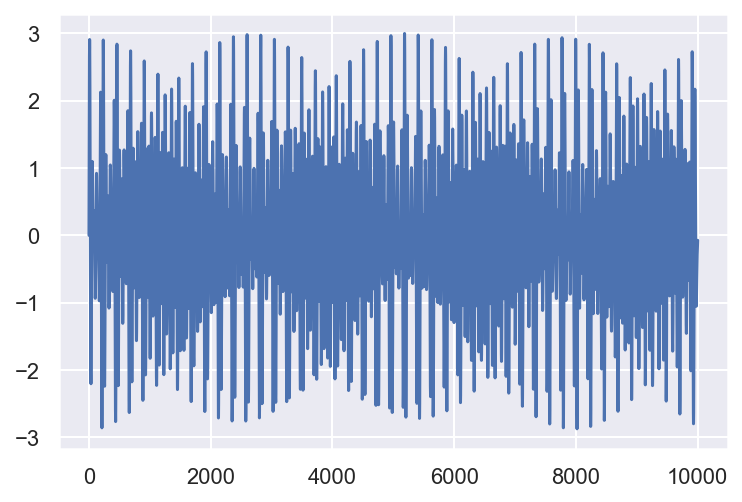

In [53]:
tone_C = single_tone(261.62)
tone_E = single_tone(329.62)
tone_G = single_tone(392)
harmony = tone_C + tone_E + tone_G

plt.plot(harmony[:10000])
plt.show()

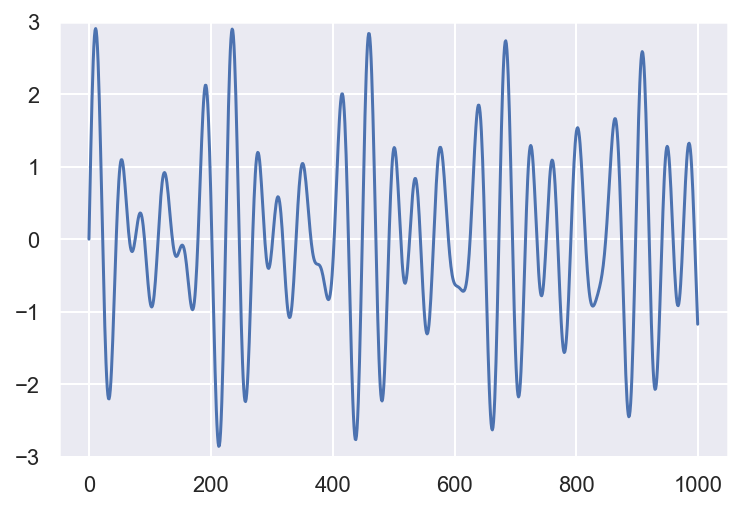

In [63]:
plt.plot(harmony[:1000])
plt.ylim(-3, 3)
plt.show()

In [45]:
tone_C[:3]

array([0.        , 0.11159322, 0.2217924 ])

In [60]:
harmony[:3]

array([0.        , 0.41879191, 0.82873571])

In [47]:
harmony.shape

(44100,)

In [61]:
display(Audio(harmony, rate=44100))

## wave 형식 파일

음악시디 원본이 이거야. 가장 높은 음이 32767, 가장 낮음 음이 -32768로 저장된다는 것.

wave 파일은 음압 시계열 데이터를 저장하는 가장 기본적인 파일 형식으로 `.wav` 확장자로 표시한다. wave 파일은 보통 초당 44100번 음압을 측정하고 $-32768 \sim 32767(=2^{15})$까지의 2바이트(bytes) 숫자로 기록한다. 

파이썬에서 wave 파일을 쓰거나 읽기 위해서는 scipy 패키지의 io.wavfile 서브패키지에서 제공하는 `read`, `write` 명령을 사용한다.

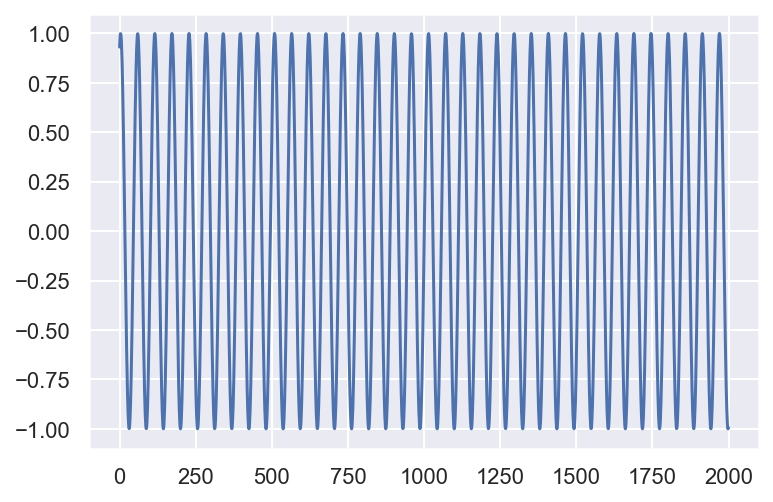

In [68]:
import scipy.io.wavfile

# 초당 샘플링 데이터 수 
sampling_rate = 44100
sp.io.wavfile.write("octave.wav", sampling_rate, octave)

sr, y_read = sp.io.wavfile.read("octave.wav")
# sr == sampling_rate

plt.plot(y_read[4000:6000])
plt.show()

In [8]:
Audio(y_read, rate=sr)

## Dual-tone multi-frequency signaling

우리가 전화번호 하나 누를 때마다, 2개의 소리가 동시에 나는 것. <br>
예를 들어, 1을 누르면? 아래 표에서, *697 Hz*, *1209 Hz*가 동시에 나는 것.<br>
소리를 듣고서 무슨 번호 눌렀는지도 알 수 있음. <br>
성악가 데려와서 실험도 했었음. 

전화는 DTMF(Dual-tone multi-frequency) 방식이라는 두 싱글톤 조합의 음향 신호로 전화번호를 입력받는다.

<table>
<tbody><tr>
<th align="center">
</th>
<th align="center">1209&nbsp;Hz
</th>
<th align="center">1336&nbsp;Hz
</th>
<th align="center">1477&nbsp;Hz
</th>
<th align="center">1633&nbsp;Hz
</th></tr>
<tr>
<th align="center">697&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/b/bf/Dtmf1.ogg" class="internal" title="Dtmf1.ogg">1</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/7/7d/Dtmf2.ogg" class="internal" title="Dtmf2.ogg">2</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/2/28/Dtmf3.ogg" class="internal" title="Dtmf3.ogg">3</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/d/d5/DtmfA.ogg" class="internal" title="DtmfA.ogg">A</a>
</td></tr>
<tr>
<th align="center">770&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/9f/Dtmf4.ogg" class="internal" title="Dtmf4.ogg">4</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/1/1c/Dtmf5.ogg" class="internal" title="Dtmf5.ogg">5</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/7/7b/Dtmf6.ogg" class="internal" title="Dtmf6.ogg">6</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/5/5a/DtmfB.ogg" class="internal" title="DtmfB.ogg">B</a>
</td></tr>
<tr>
<th align="center">852&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/9f/Dtmf7.ogg" class="internal" title="Dtmf7.ogg">7</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/f/f7/Dtmf8.ogg" class="internal" title="Dtmf8.ogg">8</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/5/59/Dtmf9.ogg" class="internal" title="Dtmf9.ogg">9</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/96/DtmfC.ogg" class="internal" title="DtmfC.ogg">C</a>
</td></tr>
<tr>
<th align="center">941&nbsp;Hz
</th>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/e/e7/DtmfStar.ogg" class="internal" title="DtmfStar.ogg">*</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/2/2d/Dtmf0.ogg" class="internal" title="Dtmf0.ogg">0</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/c/c4/Dtmf-.ogg" class="internal" title="Dtmf-.ogg">#</a>
</td>
<td align="center"><a href="//upload.wikimedia.org/wikipedia/commons/9/99/DtmfD.ogg" class="internal" title="DtmfD.ogg">D</a>
</td></tr></tbody></table>

#### 연습 문제 1

DTMF를 사용하여 자신의 전화번호를 호출하는 음향 신호를 생성하라.

In [76]:
tone_0 = single_tone(1336) + single_tone(941)
tone_1 = single_tone(697) + single_tone(1209)
tone_0 = single_tone(1336) + single_tone(941)
tone_4 = single_tone(770) + single_tone(1209)
tone_0 = single_tone(1336) + single_tone(941)
tone_4 = single_tone(770) + single_tone(1209)
tone_1 = single_tone(697) + single_tone(1209)

display(Audio(np.hstack([tone_0, tone_1,tone_0,tone_4,tone_0,tone_4,tone_1]), rate=sr))

# 푸리에 변환과 스펙트럼

음성(speech), 음악(music) 등의 음향(sound) 데이터에서 특징(feature)을 추출하는 방법인 푸리에 변환(Fourier transfrom)과 스펙트럼(spectrum)에 대해서 알아본다.

## 정현파 조합

모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있다. 퓨리에 변환은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법이다.

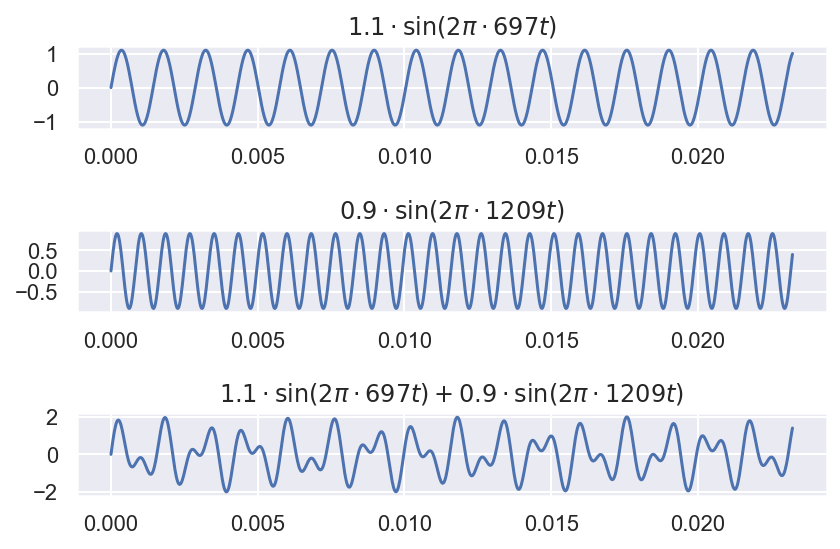

In [9]:
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2

plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.tight_layout()
plt.show()

## 복소 지수함수

오일러 공식에 의해 지수부가 허수(imaginary number)인 복소 지수함수(complex exponential function)는 코사인 함수인 실수부와 사인 함수인 허수부의 합으로 나타난다. 

$$ \exp(i\cdot x) = \cos x + i\sin x $$

다음은 주기가 $T$, 주파수가 $\frac{2\pi}{T}$인 복수 지수함수로서 주기가 $T$인 사인과 코사인의 조합이 된다.

$$ \exp \left( i\cdot 2\pi\frac{1}{T} t \right) = \cos \left(2\pi \dfrac{1}{T} t \right) +i\sin \left(2\pi \dfrac{1}{T} t \right) $$

따라서 주기가 $\frac{T}{n}$, 주파수가 $n\frac{2\pi}{T}$인 복수 지수함수는 다음과 같다.

$$ \exp \left( i\cdot 2\pi\frac{n}{T} t \right) = \cos \left(2\pi \dfrac{n}{T} t \right) +i\sin \left(2\pi \dfrac{n}{T} t \right) $$

## 푸리에 변환

주기 $T$를 가지고 반복되는(cyclic) 모든 함수 $y(t)$는 주파수와 진폭이 다른 몇 개의 사인 함수(정확히는 복수 지수함수)의 합으로 나타낼 수 있다. 이 사인 함수의 진폭을 구하는 과정을 푸리에 변환(Fourier Transform)이라고 한다.

$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$

이 식에서 $k$번째 사인 함수의 진폭 $A_n$은 다음 식으로 계산한다. 이것이 푸리에 변환이다.

$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} y(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$

## 이산 푸리에 변환

이산 푸리에 변환(Discrete Fourier Transform) 또는 DFT는 길이가 $N$인 이산시간 시계열 데이터 

$$ y_0, y_1, \ldots, y_{N-1} $$

이 있을 때 이 이산시간 시계열이 주기 $N$으로 계속 반복된다고 가정하여 푸리에 변환을 한 것이다.

이 때 원래의 이산시간 시계열 데이터는 다음 주파수와 진폭이 다른 $N$개의 사인 함수의 합으로 나타난다.

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

이 때 진폭 $Y_k$를 원래의 시계열 데이터에 대한 푸리에 변환값이라고 한다.

$$
Y_k = \sum_{n=0}^{N-1} y_n \cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

## 고속 퓨리에 변환

고속 퓨리에 변환(Fast Fourier Transform, FFT)는 아주 적은 계산량으로 DFT를 하는 알고리즘을 말한다. 길이가 $2^N$인 시계열에만 적용할 수 있다는 단점이 있지만 보통의 DFT가 $O(N^2)$ 수준의 계산량을 요구하는데 반해 FFT는 $O(N\log_2 N)$ 계산량으로 DFT를 구할 수 있다.

실제로는 다음과 같이 계속 반복되는 시계열에 대해 푸리에 변환을 하는 것이다. 따라서 시계열의 시작 부분과 끝 부분이 너무 다르면 원래 시계열에는 없는 신호가 나올 수도 있는데 이를 깁스 현상(Gibbs phenomenon)이라고 한다.

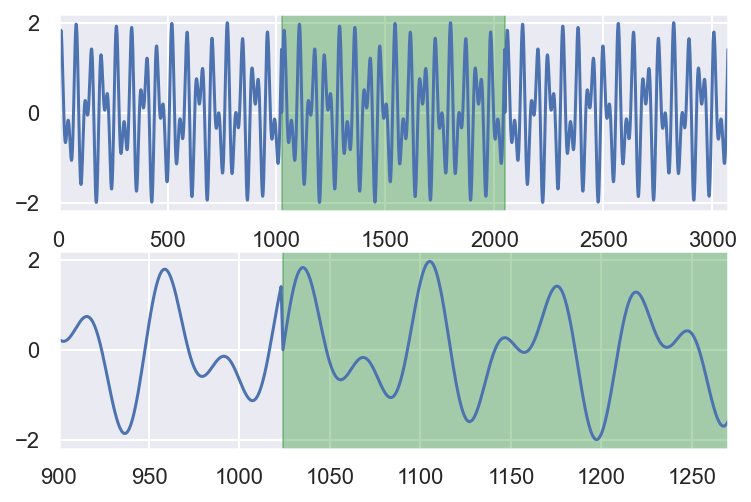

In [10]:
y2 = np.hstack([y, y, y])

plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)

plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)

plt.show()

scipy 패키지의 fftpack 서브패키지에서 제공하는 fft 명령으로 이 신호에 담겨진 주파수를 분석하면 다음과 같이 692HZ와 1211Hz 성분이 강하게 나타나는 것을 볼 수 있다. 이와 같은 플롯을 피리오도그램(periodogram)이라고 한다.

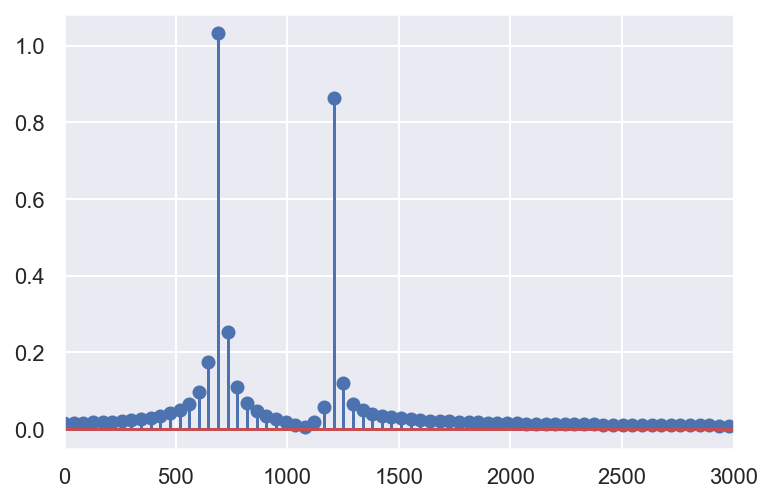

In [11]:
from scipy.fftpack import fft

yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

## DCT

DCT(Discrete Cosine Transform)는 DFT와 유사하지만 기저함수로 복소 지수함수가 아닌 코사인 함수를 사용한다. 
DFT보다 계산이 간단하고 실수만 출력한다는 장점이 있어서 DFT 대용으로 많이 사용된다. 

$$ 
Y_k = \sum_{n=0}^{N-1} y_n \cdot \cos \left( 2\pi\frac{k}{N} \left(\frac{2n+1}{4}\right)\right)  
$$

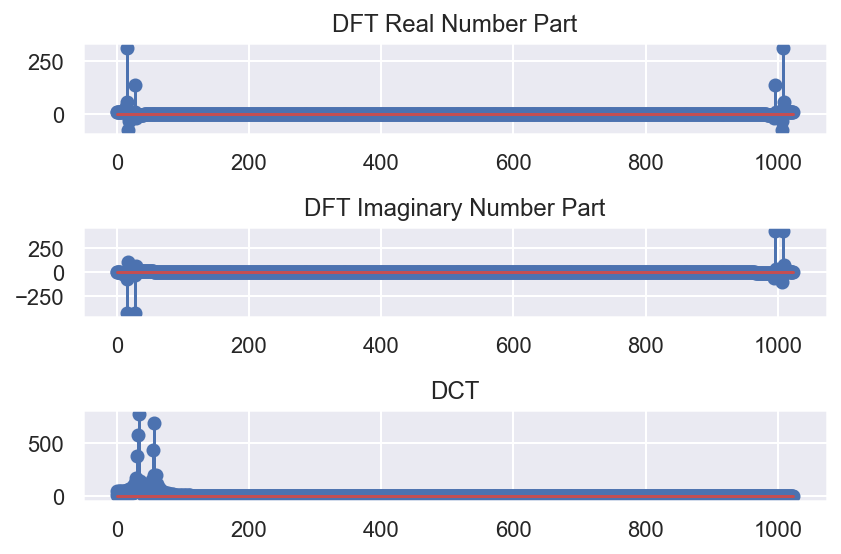

In [20]:
from scipy.fftpack import dct

dct_type = 2
yf2 = dct(y, dct_type, N)

plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT Real Number Part")

plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT Imaginary Number Part")

plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")

plt.tight_layout()
plt.show()

## 스펙트럼

보통 스펙트럼(spectrum)이라고 부르는 시계열 분석의 정확한 명칭은 파워 스펙트럼(power spectrum) 또는 스펙트럼 밀도(spectral density)이다. 

푸리에 변환은 결정론적인 시계열 데이터를 주파수 영역으로 변환하는 것을 말하지만 **스펙트럼(spectrum)은 확률론적인 확률과정(random process) 모형을 주파수 영역으로 변환**하는 것을 말한다. 따라서 푸리에 변환과 달리 시계열의 위상(phase) 정보는 스펙트럼에 나타나지 않는다.

스펙트럼을 추정할 때 사용하는 방법 중의 하나전체 시계열을 짧은 구간으로 나눈 뒤 깁스 현상을 줄위기 위해 각 구간에 윈도우를 씌우고 FFT 계산으로 나온 값을 평균하는 방법이다. 보통은 로그 스케일로 표현한다.

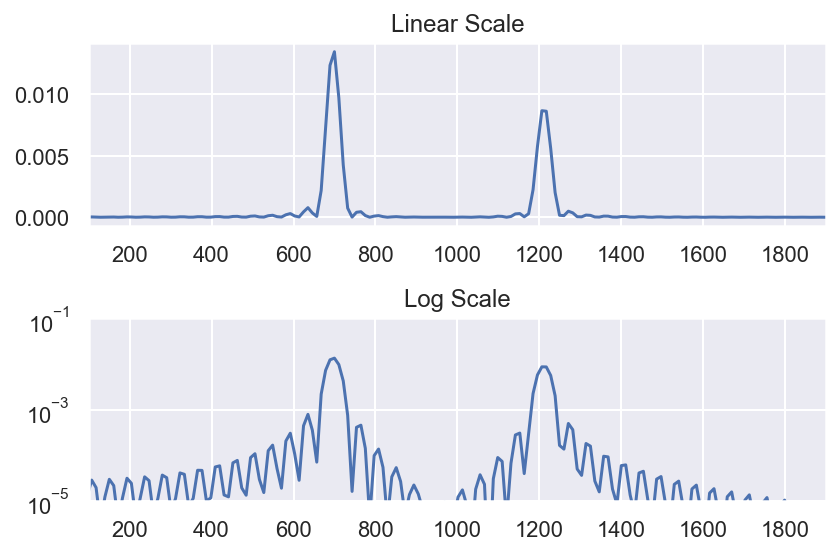

In [21]:
import scipy.signal

f, P = sp.signal.periodogram(y, 44100, nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("Linear Scale")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("Log Scale")

plt.tight_layout()
plt.show()

## STFT

STFT(Short-Time Fourier Transform)는 주파수 특성이 시간이 따라 달라지는 사운드를 분석하기 위한 방법이다. 시계열을 일정한 시간 구간으로 나누고 각 구간에 대해 스펙트럼을 구한 데이터이다. 시간-주파수의 2차원 데이터로 나타난다.

## librosa 패키지

파이썬으로 STFT 스펙트럼 분석을 하려면 librosa 패키지를 사용한다.

주피터 노트북에서 librosa 패키지를 사용할 때는 `jupyter_notebook_config.py`파일의  `iopub_data_rate_limit` 설정을 10000000 정도로 크게 해야 한다.

In [23]:
!pip3 install librosa

     |████████████████████████████████| 203 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 10.2 MB/s eta 0:00:01
     |████████████████████████████████| 377 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 613 kB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 24.5 MB/s eta 0:00:01
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23140 sha256=40b10cf43fc778bdfcb33c7e37c07c44c16390da366e866af39dac9b10aaa06b
  Stored in directory: /Users/sanghyuk/Library/Caches/pip/wheels/49/5a/e4/df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=c995d03c5aa02530c84179635ace6846a830336f004adfe18a849a908a96e2f7
  Stored in directory: /Users/sanghyuk/Library/Caches/pip/wheels/6f/d1/5d/f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


/Users/sanghyuk/anaconda/envs/py38/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1024
  warnings.warn(


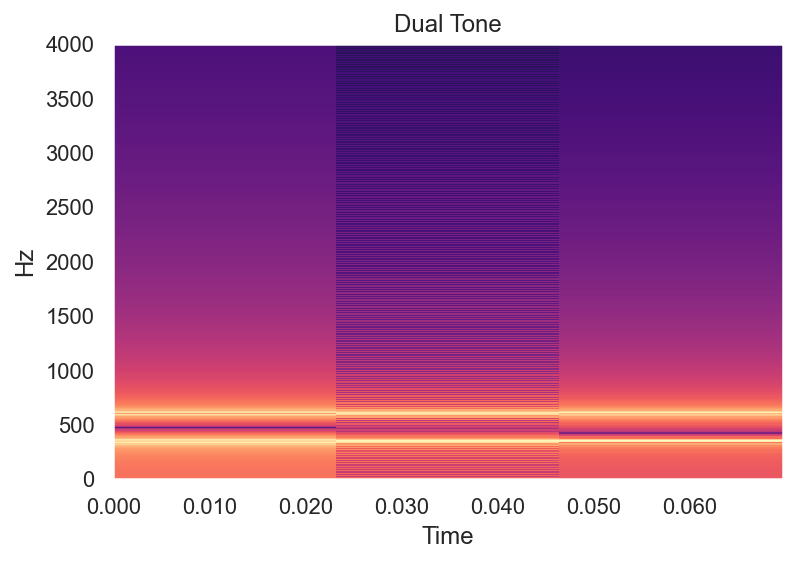

In [24]:
import librosa
import librosa.display

D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 4000)
plt.show()

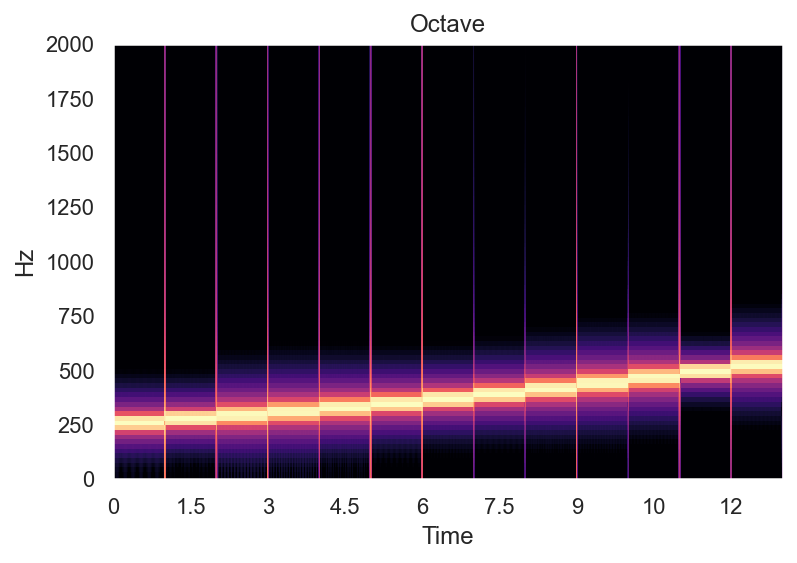

In [25]:
sr_octave, y_octave = sp.io.wavfile.read("octave.wav")

D_octave = np.abs(librosa.stft(y_octave))
librosa.display.specshow(librosa.amplitude_to_db(D_octave, ref=np.max), sr=sr_octave, y_axis='linear', x_axis='time')
plt.title('Octave')
plt.ylim(0, 2000)
plt.show()

## 멜 스펙트럼

멜 스펙트럼은 주파수의 단위를 다음 공식을 따라 멜 단위(mel unit)로 바꾼 스펙트럼을 말한다.

$$ m = 2595 \log_{10}\left(1 + \frac{f}{700}\right) $$

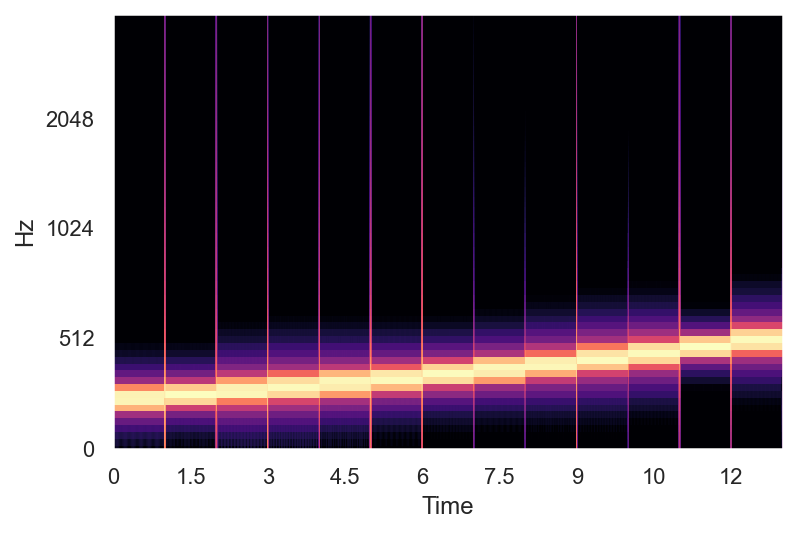

In [26]:
S_octave = librosa.feature.melspectrogram(y=y_octave, sr=sr_octave, n_mels=128)
librosa.display.specshow(librosa.power_to_db(S_octave, ref=np.max), sr=sr_octave, y_axis='mel', x_axis='time')
plt.ylim(0, 4000)
plt.show()

## MFCC

MFCC(Mel-frequency cepstral coefficients)는 Mel Scale Spectrum을 40개의 주파수 구역(band)으로 묶은뒤에 이를 다시 푸리에 변환하여 얻은 계수이다. 스펙트럼이 어떤 모양으로 되어 있는지를 나타내는 특성값이라고 생각할 수 있다.

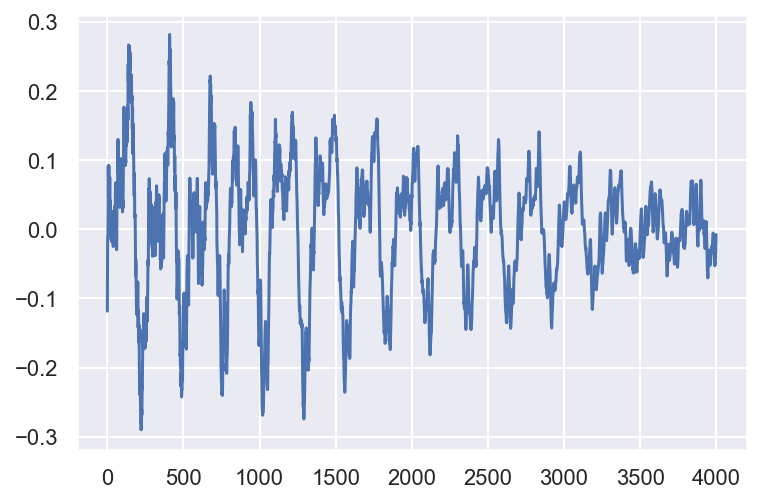

In [30]:
y, sr = librosa.load(librosa.util.example_audio_file(), offset=30, duration=5)

plt.plot(y[1000:5000])
plt.show()

In [18]:
from IPython.display import Audio, display
Audio(y, rate=sr)

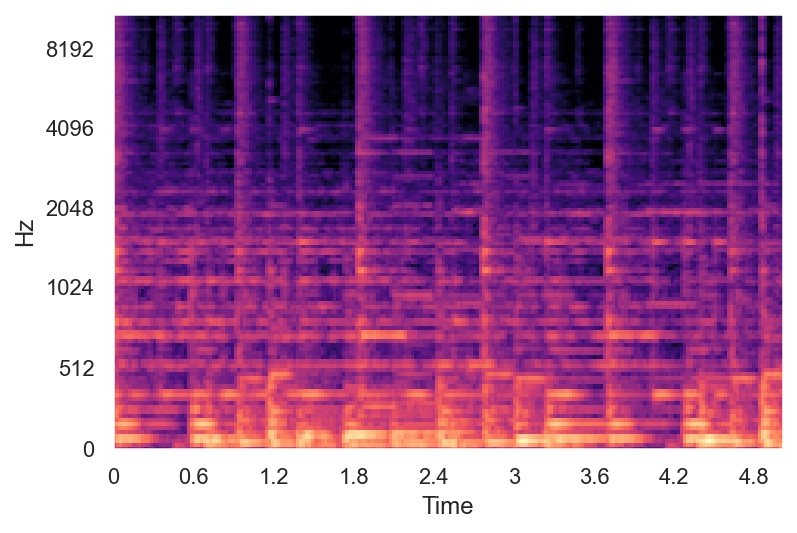

In [28]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, y_axis='mel', x_axis='time')
plt.show()

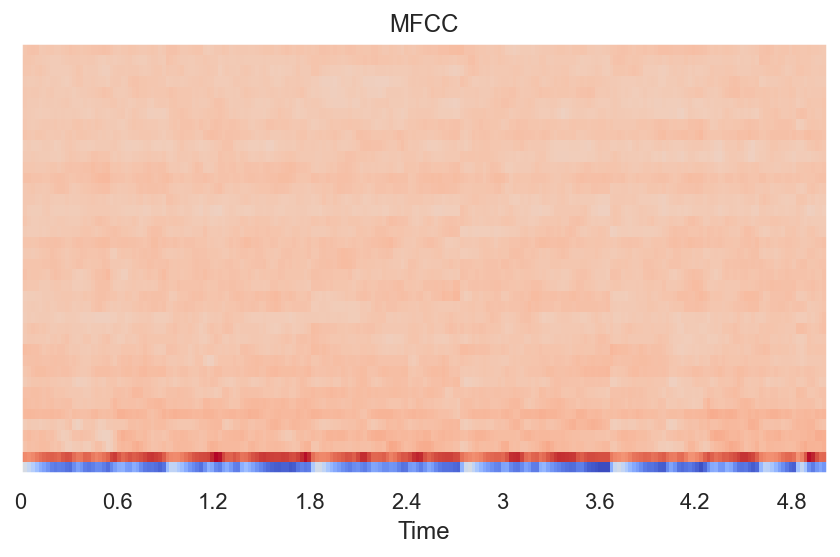

In [29]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis='time')
plt.title('MFCC')
plt.tight_layout()
plt.show()